In [47]:
#import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format',  '{:,}'.format)

In [2]:
#upload file 
df = pd.read_csv('df_1_year.csv')
df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month
0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00
1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00
2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00
3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00
4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00


In [3]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235887 entries, 0 to 3235886
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   Unnamed: 0          int64         
 1   ride_id             object        
 2   rideable_type       object        
 3   started_at          datetime64[ns]
 4   ended_at            datetime64[ns]
 5   start_station_name  object        
 6   start_station_id    object        
 7   end_station_name    object        
 8   end_station_id      object        
 9   start_lat           float64       
 10  start_lng           float64       
 11  end_lat             float64       
 12  end_lng             float64       
 13  member_casual       object        
 14  Year                int64         
 15  Month               int64         
 16  ride_length         float64       
 17  Year-Month          object        
dtypes: datetime64[ns](2), float64(5), int64(3), object(8)
memory usage: 444.4+ MB


In [63]:
df['duration_trip_sec'] = (df['ended_at'] - df['started_at']).dt.total_seconds()
duration_stat = df.agg({'duration_trip_sec': ["count", "min", "max", "mean", "median"]})
print(duration_stat)

        duration_trip_sec
count         3,235,887.0
min                   1.0
max               2,417.0
mean     756.494771603582
median              614.0


In [10]:
el_bike = df[df['rideable_type'] == 'electric_bike'].reset_index()
el_bike.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,duration_trip_sec
0,0,0,99103BB87CC6C1BB,electric_bike,2021-08-10 17:15:49,2021-08-10 17:22:44,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.68,member,2021,8,6.916667,2021-08-01 00:00:00,415.0
1,1,1,EAFCCCFB0A3FC5A1,electric_bike,2021-08-10 17:23:14,2021-08-10 17:39:24,NaN,NaN,NaN,NaN,41.77,-87.68,41.77,-87.63,member,2021,8,16.166667,2021-08-01 00:00:00,970.0
2,2,2,9EF4F46C57AD234D,electric_bike,2021-08-21 02:34:23,2021-08-21 02:50:36,NaN,NaN,NaN,NaN,41.95,-87.65,41.97,-87.66,member,2021,8,16.216667,2021-08-01 00:00:00,973.0
3,3,5,612F12C94A964F3E,electric_bike,2021-08-19 12:41:12,2021-08-19 12:47:47,NaN,NaN,NaN,NaN,41.81,-87.61,41.80,-87.60,member,2021,8,6.583333,2021-08-01 00:00:00,395.0
4,4,6,C7435946FDFFA9B7,electric_bike,2021-08-19 12:21:50,2021-08-19 12:37:31,NaN,NaN,NaN,NaN,41.77,-87.62,41.81,-87.61,member,2021,8,15.683333,2021-08-01 00:00:00,941.0


In [11]:
cl_bike = df[df['rideable_type'] == 'classic_bike'].reset_index()
cl_bike.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,duration_trip_sec
0,17,30,DD06751C6019D865,classic_bike,2021-08-08 17:21:26,2021-08-08 17:25:37,Desplaines St & Kinzie St,TA1306000003,Kingsbury St & Kinzie St,KA1503000043,41.888716,-87.644448,41.889177,-87.638506,member,2021,8,4.183333,2021-08-01 00:00:00,251.0
1,23,40,0249AD4B258806AD,classic_bike,2021-08-08 12:59:18,2021-08-08 12:59:55,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,member,2021,8,0.616667,2021-08-01 00:00:00,37.0
2,59,121,B149E6C71A1C3B14,classic_bike,2021-08-23 15:33:04,2021-08-23 16:09:00,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.900960,-87.623777,41.900960,-87.623777,casual,2021,8,35.933333,2021-08-01 00:00:00,2156.0
3,61,123,C41829CD6CC5A8B6,classic_bike,2021-08-23 10:11:09,2021-08-23 10:51:11,Aberdeen St & Jackson Blvd,13157,Aberdeen St & Jackson Blvd,13157,41.877726,-87.654787,41.877726,-87.654787,casual,2021,8,40.033333,2021-08-01 00:00:00,2402.0
4,100,202,6882EBAFAABDBE2D,classic_bike,2021-08-05 13:22:07,2021-08-05 13:42:44,Kingsbury St & Kinzie St,KA1503000043,Michigan Ave & Oak St,13042,41.889177,-87.638506,41.900960,-87.623777,casual,2021,8,20.616667,2021-08-01 00:00:00,1237.0


In [56]:
doc_bike = df[df['rideable_type'] == 'docked_bike'].reset_index()
doc_bike.head()

,index,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,duration_trip_sec
0,5146,11020,0229492050F1F509,docked_bike,2021-08-17 20:16:03,2021-08-17 20:30:05,Clark St & Leland Ave,TA1309000014,Clark St & Grace St,TA1307000127,41.967096,-87.667429,41.95078,-87.659172,casual,2021,8,14.033333333333331,2021-08-01 00:00:00,842.0
1,8193,17491,4988A3A88EFF9B12,docked_bike,2021-08-02 16:01:42,2021-08-02 16:37:18,Michigan Ave & Oak St,13042,Michigan Ave & Oak St,13042,41.90096,-87.623777,41.90096,-87.623777,casual,2021,8,35.6,2021-08-01 00:00:00,"2,136.0"
2,8948,19187,367D8D52BD2B42A7,docked_bike,2021-08-01 01:59:44,2021-08-01 02:21:55,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.923931,-87.635825,41.923931,-87.635825,casual,2021,8,22.183333333333334,2021-08-01 00:00:00,"1,331.0"
3,8950,19194,6452150DB01B2804,docked_bike,2021-08-19 17:03:48,2021-08-19 17:05:30,State St & Harrison St,SL-007,State St & Harrison St,SL-007,41.874053,-87.627716,41.874053,-87.627716,casual,2021,8,1.7,2021-08-01 00:00:00,102.0
4,8971,19270,4B7B3BEC2ABDB6D3,docked_bike,2021-08-23 19:13:38,2021-08-23 19:50:01,Adler Planetarium,13431,Adler Planetarium,13431,41.866095,-87.607267,41.866095,-87.607267,casual,2021,8,36.38333333333333,2021-08-01 00:00:00,"2,183.0"


In [57]:
desc_tr_el_bike = el_bike.agg({'duration_trip_sec': ['count', "min", "max", "mean", "median"]})
print(desc_tr_el_bike)

        duration_trip_sec
count         1,483,437.0
min                   1.0
max               2,417.0
mean    707.0702025094427
median              568.0


In [33]:
desc_tr_cl_bike = cl_bike.agg({'duration_trip_sec': ['count', "min", "max", "mean", "median"]})
print(desc_tr_cl_bike)

        duration_trip_sec
count         1,663,393.0
min                   1.0
max               2,417.0
mean    776.1994405411109
median              635.0


In [60]:
desc_tr_t_doc = doc_bike.agg({'duration_trip_sec': ['count', "min", "max", "mean", "median"]})
print(desc_tr_t_doc)

         duration_trip_sec
count             89,057.0
min                    1.0
max                2,417.0
mean   1,211.7271073582087
median             1,181.0


<AxesSubplot:xlabel='duration_trip_sec', ylabel='rideable_type'>

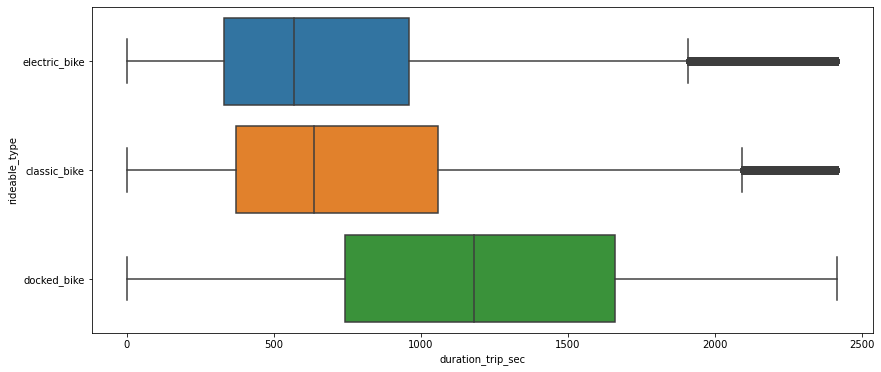

In [62]:
fig, ax = plt.subplots(figsize=(14,6))
sns.boxplot(y="rideable_type", x="duration_trip_sec", data=df)

In [96]:
prop_el_bike = round((el_bike['ride_id'].count()/df['ride_id'].count())*100, 3)
prop_cl_bike = round((cl_bike['ride_id'].count()/df['ride_id'].count())*100, 3)
prop_doc_bike = round((doc_bike['ride_id'].count()/df['ride_id'].count())*100, 3)
print('Electric bike percentage ratio: {:.2f}'.format(prop_el_bike))
print('Classic bike percentage ratio:  {:.2f}'.format(prop_cl_bike))
print('Docked bike percentage ratio:   {:.2f}'.format(prop_doc_bike))

Electric bike percentage ratio: 45.84
Classic bike percentage ratio:  51.41
Docked bike percentage ratio:   2.75


In [91]:
uniq_start_stations = df['start_station_name'].unique()
most_pop_start_stations = df.groupby('start_station_name').count()
most_pop_start_stations[]

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Year,Month,ride_length,Year-Month,duration_trip_sec
start_station_name,,,,,,,,,,,,,,,,,,
111th St - Morgan Park Metra,4,4,4,4,4,4,2,2,4,4,4,4,4,4,4,4,4,4
2112 W Peterson Ave,552,552,552,552,552,552,436,436,552,552,552,552,552,552,552,552,552,552
351,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2
532 E 43rd St,18,18,18,18,18,18,7,7,18,18,18,18,18,18,18,18,18,18
63rd & Western Ave - north corner,2,2,2,2,2,2,1,1,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yale Ave & 119th St,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1
Yates Blvd & 75th St,126,126,126,126,126,126,99,99,126,126,126,126,126,126,126,126,126,126
Yates Blvd & 93rd St,62,62,62,62,62,62,30,30,62,62,62,62,62,62,62,62,62,62


In [95]:
station_df = df[['start_station_name', 'start_station_id']]
station_count_df=station_df.groupby('start_station_name').count().sort_values('start_station_id', ascending=False)
station_count_df.head(20)

,start_station_id
start_station_name,
Streeter Dr & Grand Ave,37925
Wells St & Concord Ln,24393
DuSable Lake Shore Dr & North Blvd,23904
Clark St & Elm St,21534
Wells St & Elm St,20792
Michigan Ave & Oak St,20474
Kingsbury St & Kinzie St,20337
DuSable Lake Shore Dr & Monroe St,19128
Theater on the Lake,19045
